In [58]:
# Dependencies and Setup
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_trial_data = pd.merge(mouse_data, trial_data, on='Mouse ID')

# Display the data table for preview
mouse_trial_data


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [59]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_groupby = mouse_trial_data.groupby(['Drug', 'Timepoint'])
drug_time_groupby['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
drug_time_df = pd.DataFrame(drug_time_groupby['Tumor Volume (mm3)'].mean())

# Preview DataFrame
drug_time_df = drug_time_df.reset_index()
drug_time_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [60]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error = drug_time_groupby['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
tumor_error_df = pd.DataFrame(tumor_error)

# Preview DataFrame
tumor_error_df = tumor_error_df.reset_index()
tumor_error_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [61]:
# Minor Data Munging to Re-Format the Data Frames
drug_time_piv = drug_time_df.pivot(index = 'Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
drug_time_piv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [62]:
tumor_error['Infubinol']

Timepoint
0     0.000000
5     0.235102
10    0.282346
15    0.357705
20    0.476210
25    0.550315
30    0.631061
35    0.984155
40    1.055220
45    1.144427
Name: Tumor Volume (mm3), dtype: float64

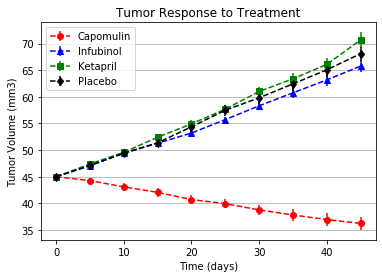

In [83]:
# Generate the Plot (with Error Bars)

# trying to consolidate the used info. Drug, plot marker, and the color of the line(s). Based on provided image 
drug_plot_info = [('Capomulin', 'o', 'red'), ('Infubinol', '^', 'blue'), ('Ketapril', 's', 'Green'), ('Placebo', 'd', 'black')]
labels = []

for (drug, mark, color) in drug_plot_info:
    labels.append(drug)
    standard_errors = tumor_error[drug]
    error_bar_plot = plt.errorbar(drug_time_piv.index, drug_time_piv[drug], yerr=standard_errors, fmt=mark, ls='--', color=color)

    
plt.gca().yaxis.grid(True)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(labels, loc='best')


# Save the Figure



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)